<a href="https://colab.research.google.com/github/HarshitaBansal17/CUSTOMER_SEGMENTATION-unsupervised.learning/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working on Transaction dataset**



# **OBJECTIVE-**
- # Find clusters based on their rfm score
- # Find which customer segmet to target based on recency and total monetary value

# **Importing all the library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Importing and reading the excel**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Transactions = pd.read_excel('/content/drive/MyDrive/Transactions.xlsx')

In [ ]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,profit_percentage,last_purchase_days_ago
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71,53,41245,18,25.352113,308
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091,388,41701,1703,81.444285,223
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793,248,36361,1545,86.168433,75
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198,381,36145,817,68.196995,121
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765,709,42226,1056,59.830028,90


In [ ]:
Transactions.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date,profit,profit_percentage,last_purchase_days_ago
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,45.36465,1738.246050,1107.321150,555.503800,37823.508750,551.817350,43.876167,181.411050
std,5773.647028,30.75359,1011.951046,582.788382,403.947756,4734.747044,494.412537,43.831823,105.363068
min,1.000000,0.00000,1.000000,12.000000,7.000000,0.000000,-540.000000,-3375.000000,0.000000
25%,5000.750000,18.00000,857.750000,575.000000,215.000000,35560.000000,134.000000,25.000000,89.000000
50%,10000.500000,44.00000,1736.000000,1163.000000,507.000000,38206.000000,445.000000,40.031397,180.000000
75%,15000.250000,72.00000,2613.000000,1635.000000,795.000000,40672.000000,830.000000,67.426710,273.000000
max,20000.000000,100.00000,5034.000000,2091.000000,1759.000000,42710.000000,1703.000000,98.993808,363.000000


In [ ]:
Transactions.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
profit                     0
profit_percentage          0
last_purchase_days_ago     0
dtype: int64

# **CREATING RFM TABLE**

In [ ]:
rfmTable =Transactions.groupby('customer_id').agg({
 'last_purchase_days_ago': lambda x: x.min(),
 'customer_id': lambda x: len(x),
 'profit': lambda x: x.sum()
})
rfmTable.rename(columns={
 'last_purchase_days_ago': 'recency',
 'customer_id': 'frequency',
 'profit': 'monetary_value'
 }, inplace=True
)

In [ ]:
rfmTable.shape

(3494, 3)

In [ ]:
rfmTable.head()


,recency,frequency,monetary_value
customer_id,,,
1,7,11,3016
2,128,3,2226
3,102,8,3363
4,195,2,221
5,16,6,2394


In [ ]:
df_customer= rfmTable.copy()


In [ ]:
df_customer

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3016
2,128,3,2226
3,102,8,3363
4,195,2,221
5,16,6,2394
...,...,...,...
3497,52,3,1649
3498,127,6,3147
3499,51,7,4957


# **Resetting the index**

In [ ]:
# Reset the index and move 'customer_id' to a column
df_customer.reset_index(drop=False, inplace=True)

df_customer


,customer_id,recency,frequency,monetary_value
0,1,7,11,3016
1,2,128,3,2226
2,3,102,8,3363
3,4,195,2,221
4,5,16,6,2394
...,...,...,...,...
3489,3497,52,3,1649
3490,3498,127,6,3147
3491,3499,51,7,4957
3492,3500,144,6,1787


In [ ]:
df_customer.describe()

,customer_id,recency,frequency,monetary_value
count,3494.000000,3494.000000,3494.000000,3494.00000
mean,1750.856039,60.813681,5.724098,3158.65684
std,1011.902531,57.787120,2.325873,1778.75863
min,1.000000,0.000000,1.000000,15.00000
25%,876.250000,17.000000,4.000000,1874.00000
50%,1750.500000,44.000000,6.000000,2891.50000
75%,2624.750000,85.000000,7.000000,4240.75000
max,5034.000000,353.000000,14.000000,11668.00000


In [ ]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,17.0,4.0,1874.00
0.50,44.0,6.0,2891.50
0.75,85.0,7.0,4240.75


# **Plotting the boxplots and finding the outliers**

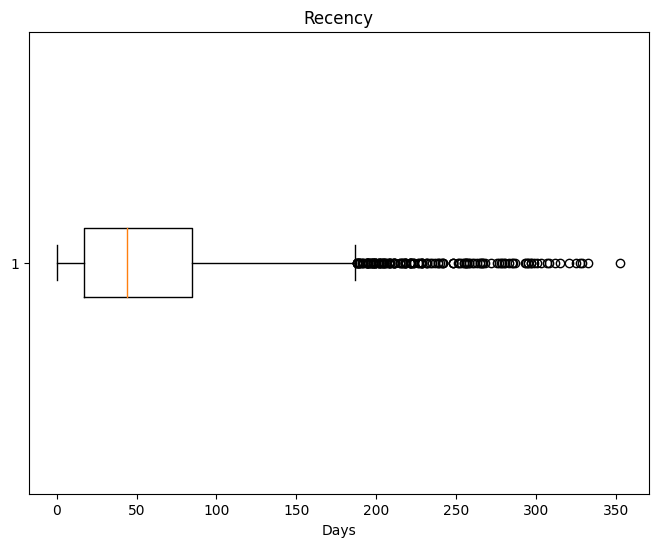

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Box plot for 'recency' horizontally
ax.boxplot(df_customer['recency'], vert=False)
ax.set_title('Recency')
ax.set_xlabel('Days')

# Show the plot
plt.show()


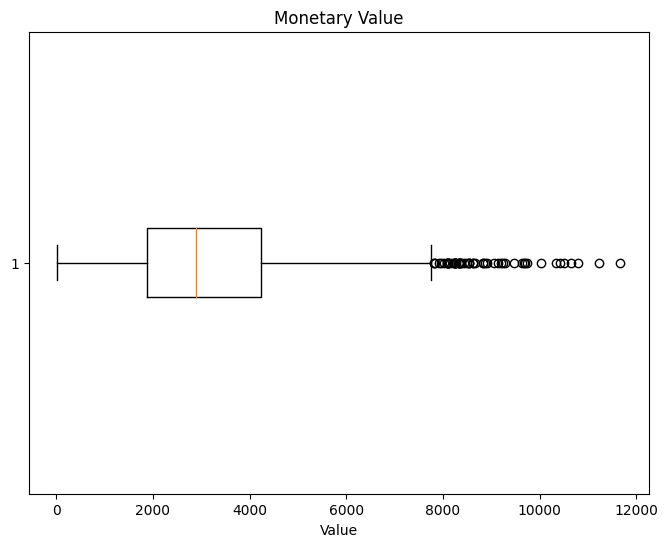

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Box plot for 'monetary_value' horizontally
ax.boxplot(df_customer['monetary_value'], vert=False)
ax.set_title('Monetary Value')
ax.set_xlabel('Value')

# Show the plot
plt.show()

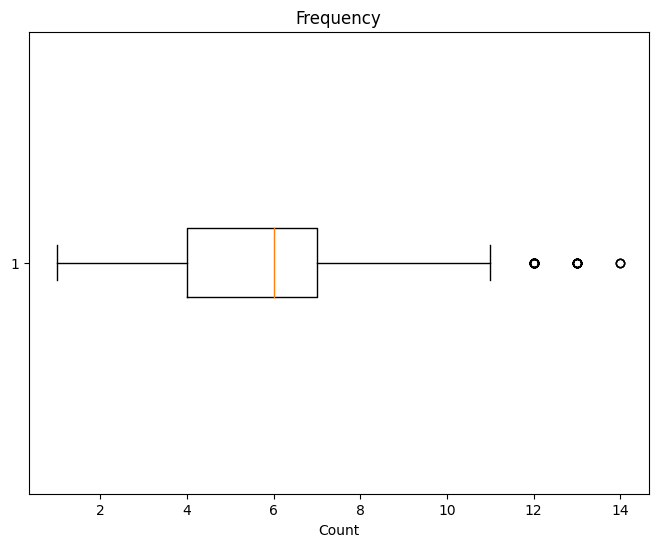

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Box plot for 'frequency' horizontally
ax.boxplot(df_customer['frequency'], vert=False)
ax.set_title('Frequency')
ax.set_xlabel('Count')

# Show the plot
plt.show()


# **Plotting histograms for Recency, Frequency and Monetary value**

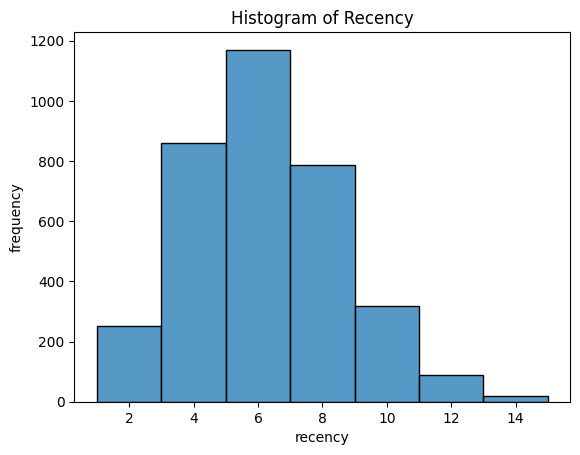

In [ ]:
ax = sns.histplot(data = df_customer, x= 'frequency', binwidth=2)
ax.set(xlabel = 'recency', ylabel = 'frequency', title = 'Histogram of Recency')
plt.show()


# **ANALYSIS**

1. Recency and frequency follow a normal distribution
2.Average recency group seems to have higher frequency

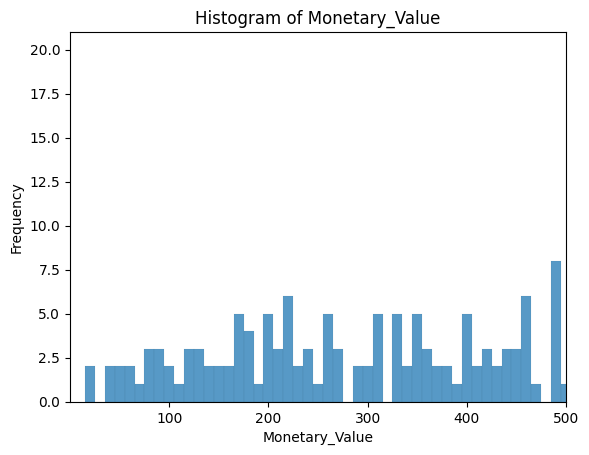

In [ ]:
ax =sns.histplot(data = df_customer, x= 'monetary_value', binwidth=10)
ax.set_xlim(0,500)
ax.set_xticks([100,200,300,400, 500])
ax.set(xlabel = 'Monetary_Value', ylabel = 'Frequency', title = 'Histogram of Monetary_Value')
plt.show()


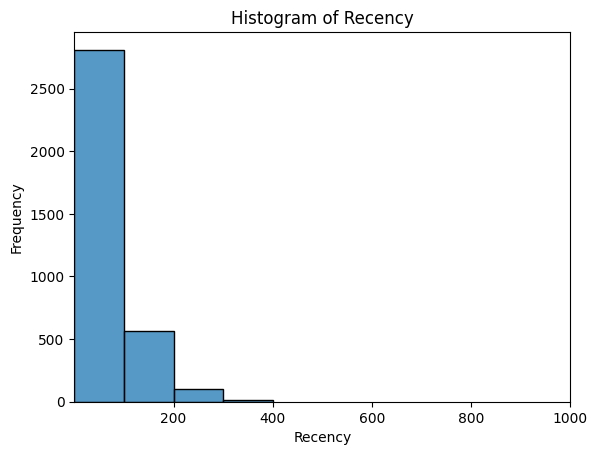

In [ ]:
ax =sns.histplot(data = df_customer, x= 'recency', binwidth=100)
ax.set_xlim(0,1000)
ax.set_xticks([200,400,600,800,1000])
ax.set(xlabel = 'Recency', ylabel = 'Frequency', title = 'Histogram of Recency')
plt.show()


Log Transformation

In [ ]:
df_transform =df_customer.copy()
df_transform['monetary_value'] = np.log(df_customer['monetary_value'])

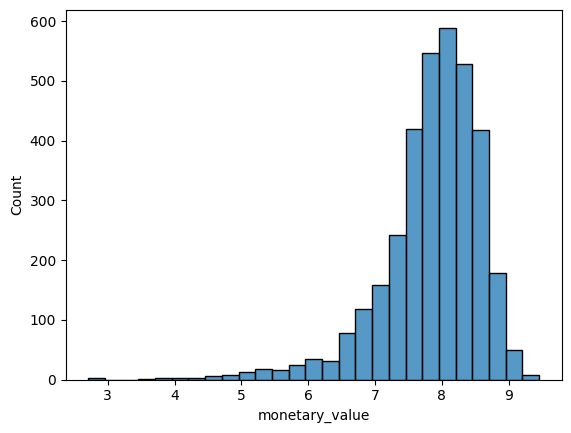

In [ ]:
sns.histplot(data = df_transform, x= 'monetary_value', binwidth=.25)
plt.show()

# **Scaling the data using standard scaler**





In [ ]:
df_customer.set_index('customer_id', inplace=True)
df_norm = (df_transform - df_transform.mean())/df_transform.std()

df_norm.head()

,customer_id,recency,frequency,monetary_value
0,-1.729273,-0.931240,2.268353,0.215497
1,-1.728285,1.162652,-1.171215,-0.190647
2,-1.727297,0.712725,0.978515,0.361122
3,-1.726309,2.322080,-1.601162,-3.279329
4,-1.725320,-0.775496,0.118623,-0.093352


# **Model Building**


# **1.KMEANS CLUSTERING**

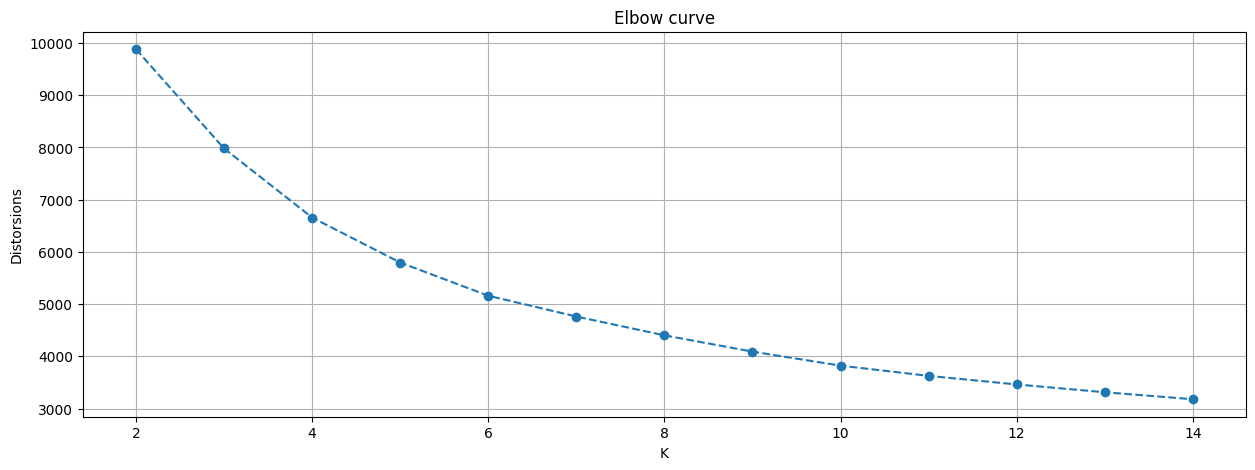

In [ ]:
#finding optimum k values
from sklearn.cluster import KMeans
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(df_norm)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions,'o--')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');


# **Optimal k = 6 from the elbow method**







In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_norm)

KMeans(n_clusters=6, random_state=0)

In [ ]:
df_customer["cluster_id"] = kmeans.labels_
df_customer.head(10)
df_customer['Total Value'] =df_customer['frequency']* df_customer['monetary_value']

In [ ]:
df_customer.groupby('cluster_id')[['recency', 'Total Value']].mean()


,recency,Total Value
cluster_id,,
0,45.839080,11402.172414
1,178.619048,9043.113757
2,39.819527,38933.267751
3,47.291367,12084.593525
4,100.260204,1113.933673
5,36.783094,39133.385965


# **ANALYSIS**


1.Important Segments to act upon based on K Means Clustering
Group 0 and Group 3 are the groups the business should focus

Group 0 These are the customers currently buying the product  and they are generating a high bill value. So steps should be taken by the business to engagae the Group 0 customers

Group 3 These are the group of customers visited might be months back and haven't visited thereafter. But they have generated a high bill value. So steps should be taken by the business to bring them back - Offers on special days like Birthdays, Anniversary etc - Conduct special events and inviting them



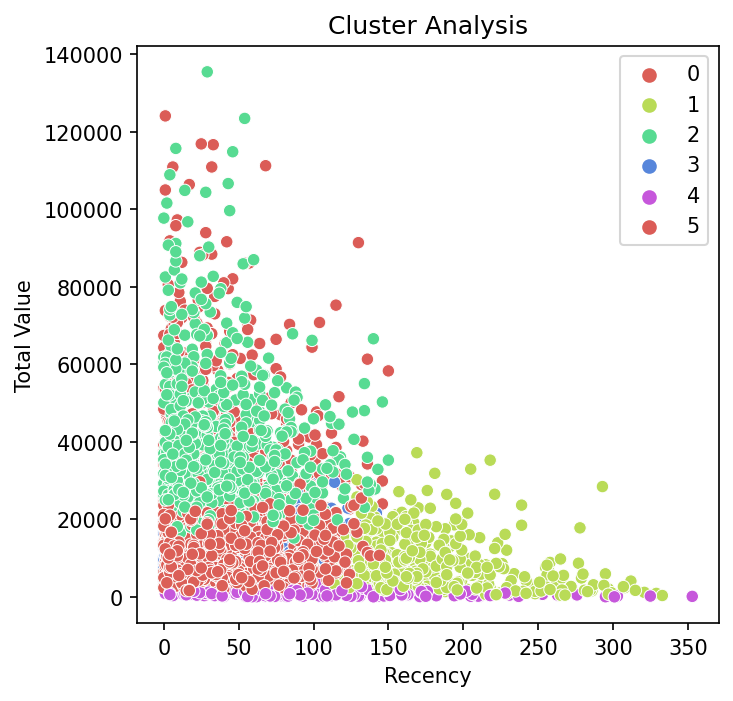

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5), dpi=150)
sns.scatterplot(x='recency', y='Total Value', hue='cluster_id', data=df_customer, palette='hls')
plt.xlabel('Recency')
plt.ylabel('Total Value')
plt.legend()
plt.title('Cluster Analysis')
plt.show()


# **ANALYSIS**


1The formation of clusters are not proper and cluster points are nearer to another cluster.


2The outliers can be detected

# **2.AGGLOMERATIVE CLUSTERING**

**2.1 SINGLE LINKAGE**

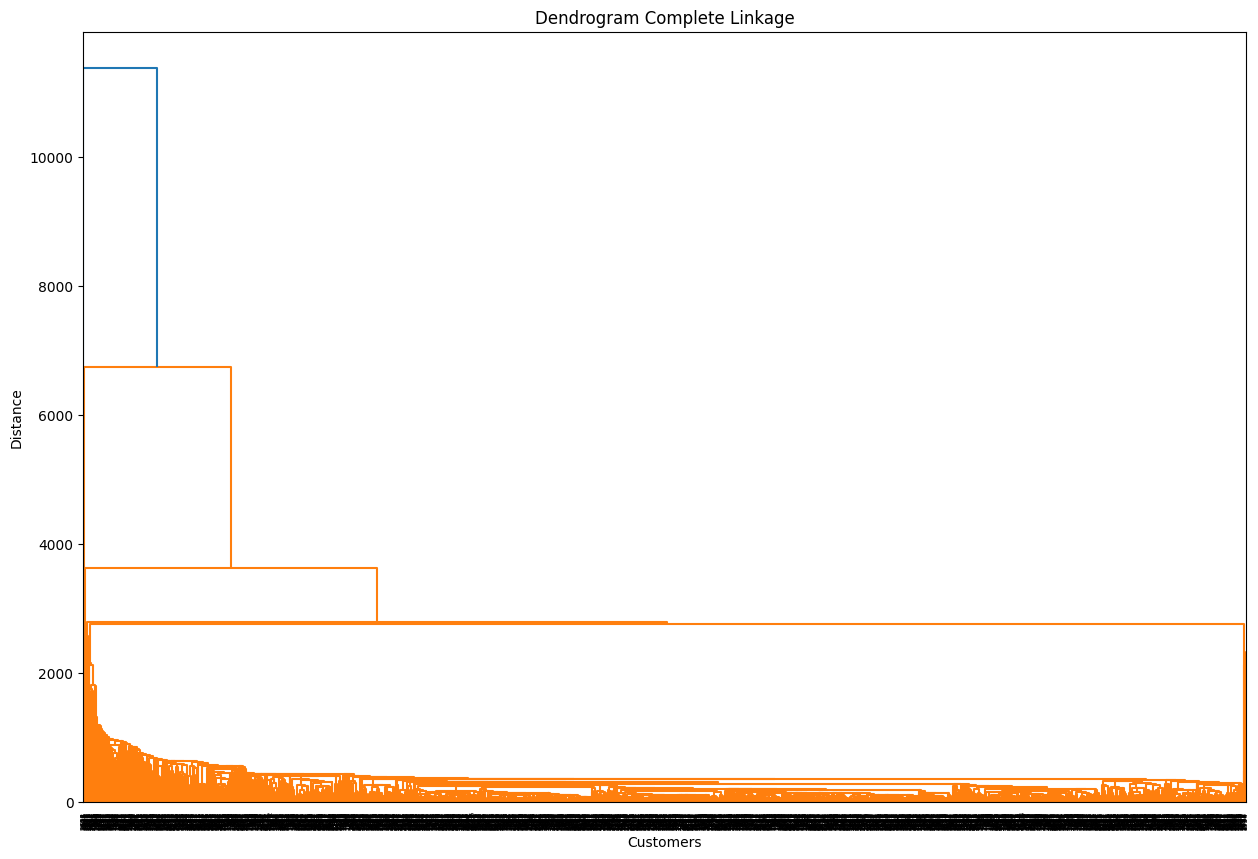

In [ ]:
#complete linkage
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(df_customer, method='single')

# Plot the dendrogram
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.title('Dendrogram Complete Linkage')
plt.show()



**2.2 COMPLETE LINKAGE**

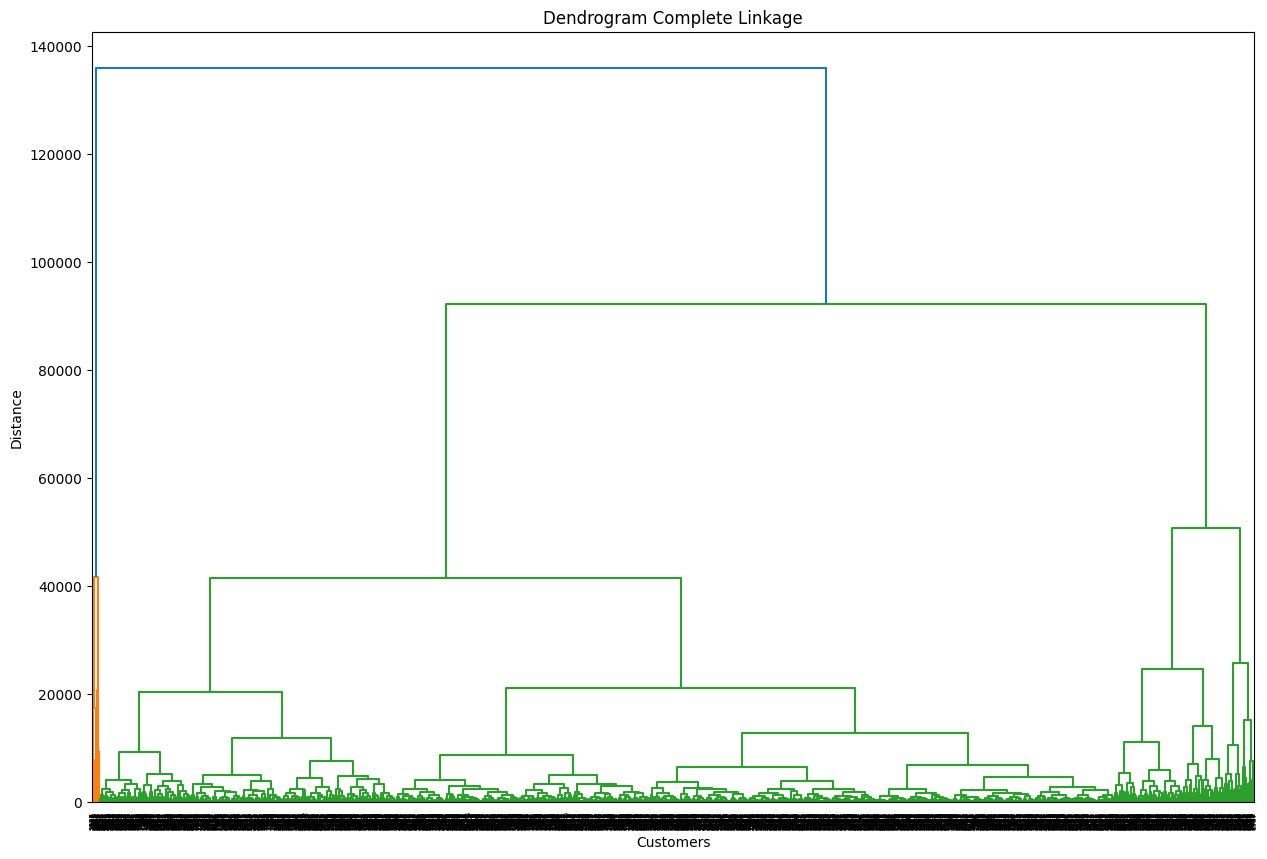

In [ ]:
#complete linkage
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(df_customer, method='complete')

# Plot the dendrogram
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.title('Dendrogram Complete Linkage')
plt.show()


**2.3. AVERAGE LINKAGE**





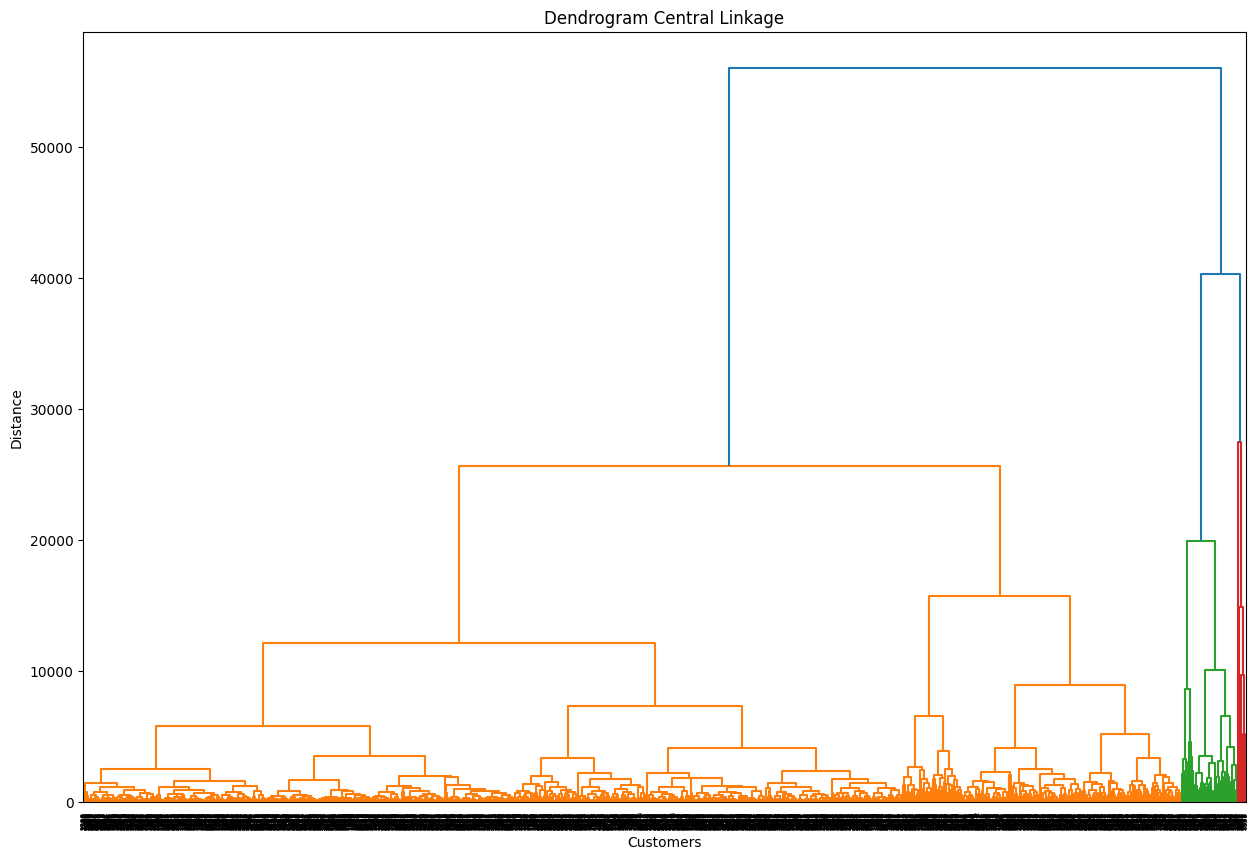

In [ ]:
#central linkage
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(df_customer, method='average')

# Plot the dendrogram
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.title('Dendrogram Central Linkage')
plt.show()


# **2.4 WARD LINKAGE**

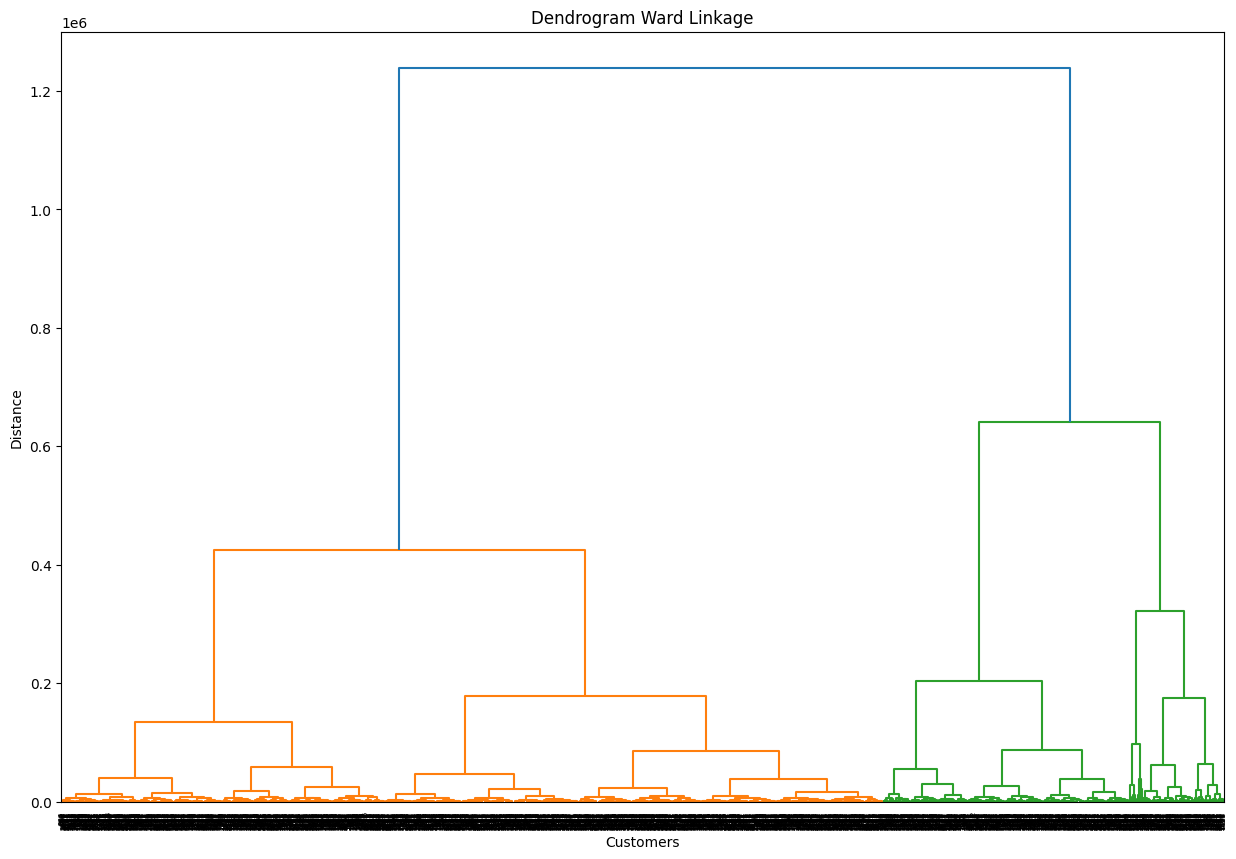

In [ ]:
#ward linkage
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(df_customer, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.title('Dendrogram Ward Linkage')
plt.show()

# **Agglomerative Clustering Graph**



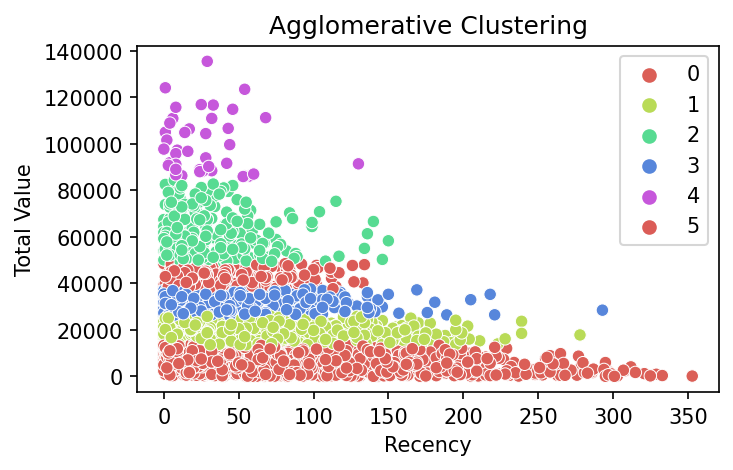

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create the AgglomerativeClustering model
cluster_model = AgglomerativeClustering(n_clusters=6)

# Fit the model to the data
clusters = cluster_model.fit_predict(df_customer)

# Add the cluster labels to the DataFrame
df_customer['cluster_id'] = clusters

# Plot the scatter plot with cluster labels
plt.figure(figsize=(5, 3), dpi=150)
sns.scatterplot(x='recency', y='Total Value', hue='cluster_id', data=df_customer, palette='hls')
plt.xlabel('Recency')
plt.ylabel('Total Value')
plt.legend()
plt.title('Agglomerative Clustering')
plt.show()


# **ANALYSIS**


1.The formaion of clusters is proper but some of the datapoints of one cluster are close to another cluster.
2. we cannot find outliers using Agglomerative clustering.
